<a href="https://colab.research.google.com/github/harshadsavle/mobile_sales_prediction/blob/main/data_mobile_price_range.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**In competitive mobile phone market companies wants**
##**to understand the sales data of mobile phones and the factors which drive the prices of the mobile phones.**
##**The objective is to find out some relation between features of a mobile phone(eg:- Internal Memory,Ram etc) and its selling price. In this problem, we do not have to predict the**
##**actual price but a price range indicating how high the price is**



*  **Battery_power** - Total energy a battery can store in one time measured in mAh
*   **Blue** - Has bluetooth or not
*   **Clock_speed** - speed at which microprocessor executes instructions
*   **Dual_sim** - Has dual sim support or not
*   **Fc** - Front Camera mega pixels
*  **Four_g** - Has 4G or not
*  **Int_memory** - Internal Memory in Gigabytes
*   **M_dep** - Mobile Depth in cm
*   **Mobile_wt** - Weight of mobile phone
*   **N_cores** - Number of cores of processor
*   **Pc** - Primary Camera mega pixels
*   **Px_height** - Pixel Resolution Height
*   **Px_width** - Pixel Resolution Width
*   **Ram** - Random Access Memory in Mega 
*   **Touch_screen** - Has touch screen or not
*   **Wifi** - Has wifi or not
*  **Sc_h** - Screen Height of mobile in cm
*   **Sc_w** - Screen Width of mobile in cm
*   **Talk_time** - longest time that a single battery charge will last when you are
*   **Three_g** - Has 3G or not
*   **Wifi** - Has wifi or not
*  **Price_range** - This is the target variable with value of 0(low cost), 1(medium cost),
2(high cost) and 3(very high cost).






In [2]:
#importing all important libraries

# importing  all necessary libraries


#data manupulation tools
import numpy as np
import pandas as pd

#data visualisation tools
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#machine learning classification tools
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import StackingClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")


In [3]:
# Mounting the google drive to import data from files
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Loading the dataset
df = pd.read_csv('/content/drive/MyDrive/capstone project 3/data_mobile_price_range.csv')

In [5]:
#let's have first look of the dataframe
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [6]:
#checking all columns present in the dataset
total_columns=df.columns
print(total_columns)
 
#also checking the number of columns present in the dataset
print(f'there are {len(total_columns)} columns in the dataset')

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')
there are 21 columns in the dataset


#analysing the data

In [7]:
#getting information of the data dtypes and null values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [8]:
# description of the data in the dataframe

df.describe()

# getting transpose of the dataframe description for better understanding
df.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


**minimum value of `px_height` and `sc_w` columns is zero so we need to handle that**

In [9]:
#total phones with sc_w=0
print('total phones with sc_w is 0 are:',len(df[df['sc_w']==0]))

#total phones with px_height=0
print('total phones with px_height is 0 are :',len(df[df['px_height']==0]))

total phones with sc_w is 0 are: 180
total phones with px_height is 0 are : 2


In [10]:
#wherever the pixel height and the screen width is zero we will impute there mean values of that column
df['sc_w'][df[df['sc_w']==0].index]=df['sc_w'].mean()
df['px_height'][df[df['px_height']==0].index]=df['sc_w'].mean()

In [11]:
#checking for duplicated values and columns present in the dataset
len(df[df.duplicated()])

0

**we are out off duplicated values**

In [12]:
#checking for null values is any is present in the dataset
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

**we dont have any null value present in the dataset**

In [13]:
#now, checking the unique values for each column

df.nunique()

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

# **Exploratory Data Analysis**

####**price**

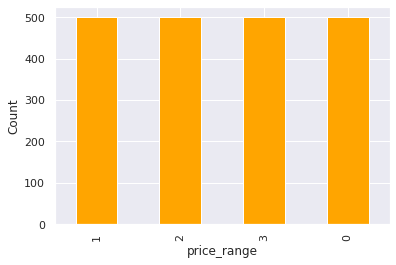

In [14]:
#classes
sns.set()
price_plot=df['price_range'].value_counts().plot(kind='bar',color='orange')
plt.xlabel('price_range')
plt.ylabel('Count')
plt.show()

**there are mobile phones in 4 price ranges. The number of elements is almost similar.**

####**battery power**

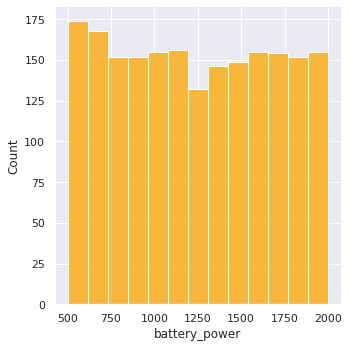

In [15]:
sns.set(rc={'figure.figsize':(5,5)})
ax=sns.displot(df["battery_power"],color='orange')
plt.show()

this plot is showing the gradual increase

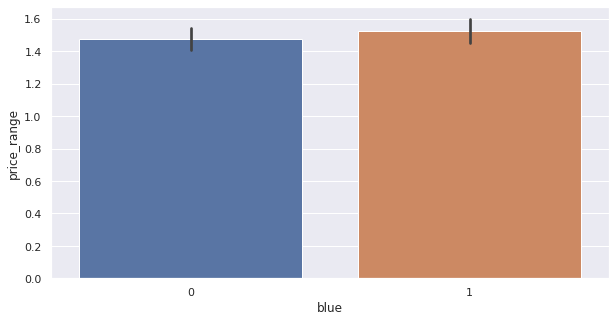

In [16]:
fig,ax=plt.subplots(figsize=(10,5))
sns.barplot(data=df,x='blue',y='price_range',ax=ax)

####**half devices have bluetooth and half the devices dont have bluetooth**

####**Ram**

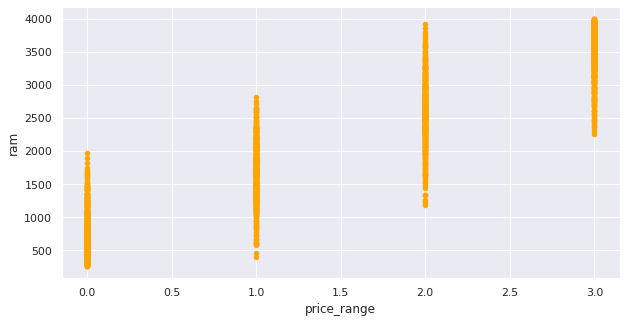

In [17]:
fig,ax=plt.subplots(figsize=(10,5))

df.plot(x='price_range',y='ram',kind='scatter',ax=ax,color='orange')



**we can see from the above scatter plot as ram is increasing the price range is also increasing**

**pixel width**

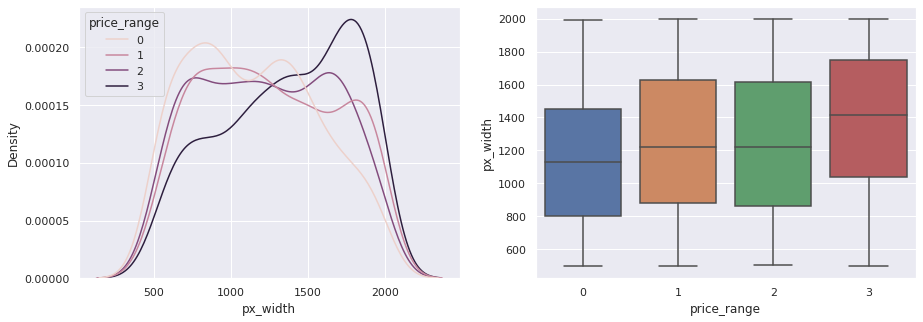

In [18]:
fig, axs = plt.subplots(1,2, figsize=(15,5))
sns.kdeplot(data=df, x='px_width', hue='price_range', ax=axs[0])
sns.boxplot(data=df, x='price_range', y='px_width', ax=axs[1])
plt.show()

There is not a continuous increase in pixel width as we move from Low cost to Very high cost. Mobiles with 'Medium cost' and 'High cost' has almost equal pixel width.
may be pixel size which combination of height and width will move with price range we'll look into it later
so we can say that it would be a driving factor in deciding price_range.

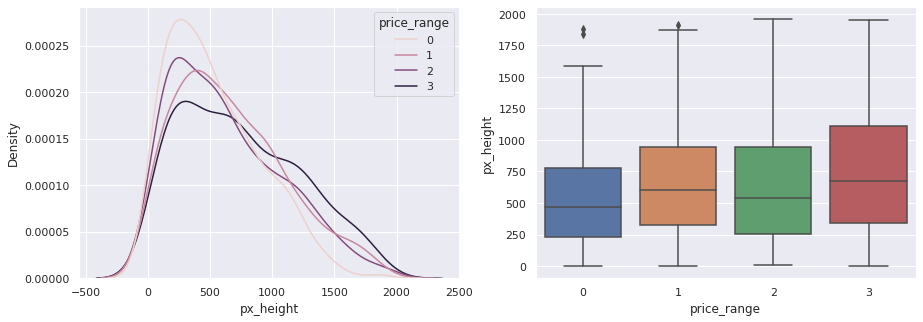

In [19]:
fig, axs = plt.subplots(1,2, figsize=(15,5))
sns.kdeplot(data=df, x='px_height', hue='price_range', ax=axs[0])
sns.boxplot(data=df, x='price_range', y='px_height', ax=axs[1])
plt.show()

Pixel height is almost similar as we move from Low cost to Very high cost.little variation in pixel_height

####**N cores (number of core in processor)**

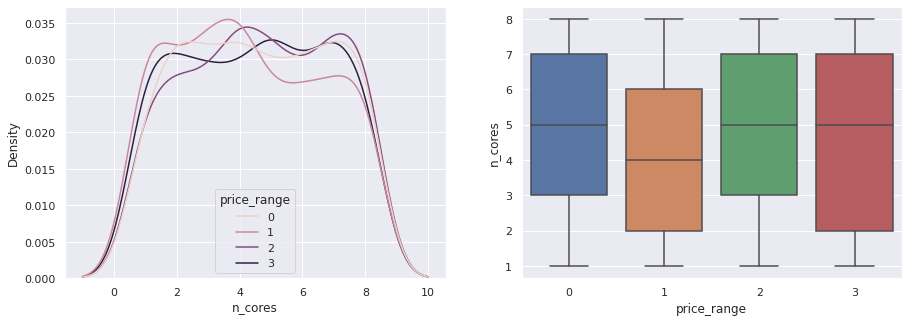

In [20]:
fig, axs = plt.subplots(1,2, figsize=(15,5))
sns.kdeplot(data=df, x='n_cores', hue='price_range', ax=axs[0])
sns.boxplot(data=df, x='price_range', y='n_cores', ax=axs[1])
plt.show()

**here In Primary camera, megapixels are showing a little variation along with the target categories, which is a good sign for prediction**

####**primary camera**

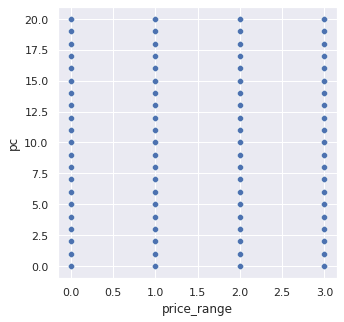

In [21]:
# plt.scatter(data=df,x='pc',y='price_range')
sns.scatterplot(data=df,x='price_range',y='pc')

###**front camera**

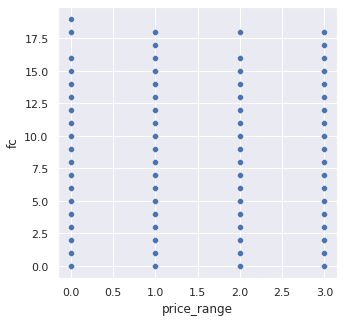

In [22]:
sns.scatterplot(data=df,x='price_range',y='fc')

both front camera and primary camera are both not so useful for us to make predictions because the feature distribution is almost similar along all the price ranges

####**mobile weight**

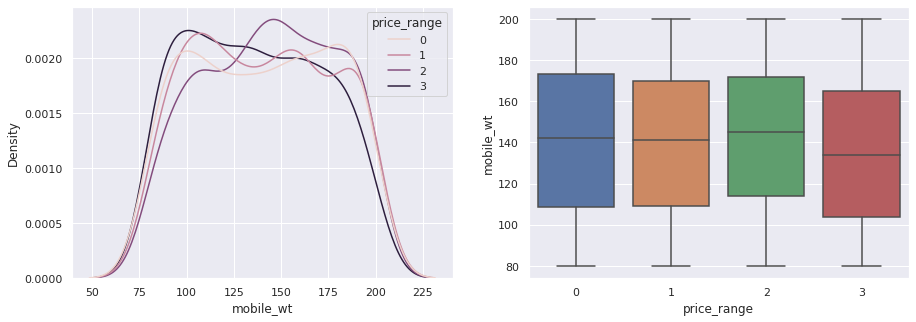

In [23]:
fig, axs = plt.subplots(1,2, figsize=(15,5))
sns.kdeplot(data=df, x='mobile_wt', hue='price_range', ax=axs[0])
sns.boxplot(data=df, x='price_range', y='mobile_wt', ax=axs[1])
plt.show()

**from the above plot we can see that the costly phones are lighter**

####**screen size**

we will convert screen_size from cm to inches, because in real life we use inches to tell a screen size.

In [24]:
# Defining new variable sc_size

df['sc_size'] = np.sqrt((df['sc_h']**2) + (df['sc_w']**2))
df['sc_size'] = round(df['sc_size']/2.54, 2)

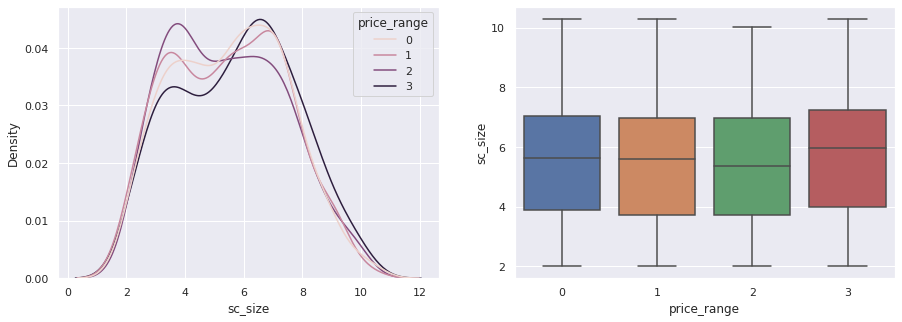

In [25]:
fig, axs = plt.subplots(1,2, figsize=(15,5))
sns.kdeplot(data=df, x='sc_size', hue='price_range', ax=axs[0])
sns.boxplot(data=df, x='price_range', y='sc_size', ax=axs[1])
plt.show()


there is the little variation alongwith the traget variables and it can be very helpful for us to make predictions.

In [26]:
# Let's drop sc_h and s_w because we made the another column called sc_size with the help of the sc_h and sc_w.

df.drop(['sc_h', 'sc_w'], axis = 1, inplace = True)

In [27]:
#making list of the  binary features we have with the name binary_features
binary_features = [ 'four_g', 'three_g']

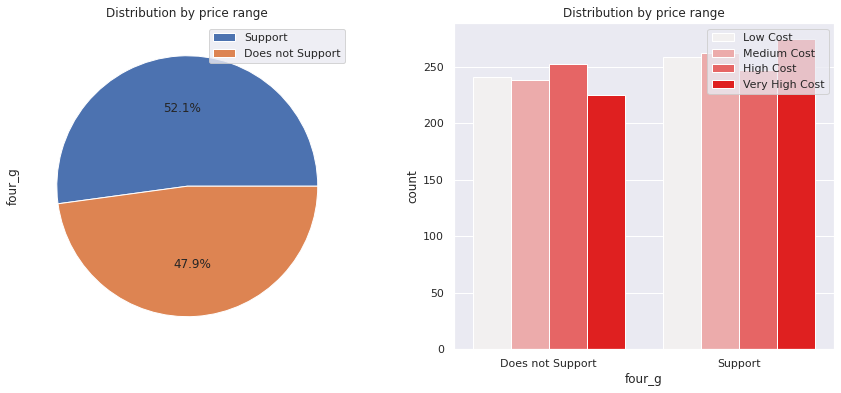

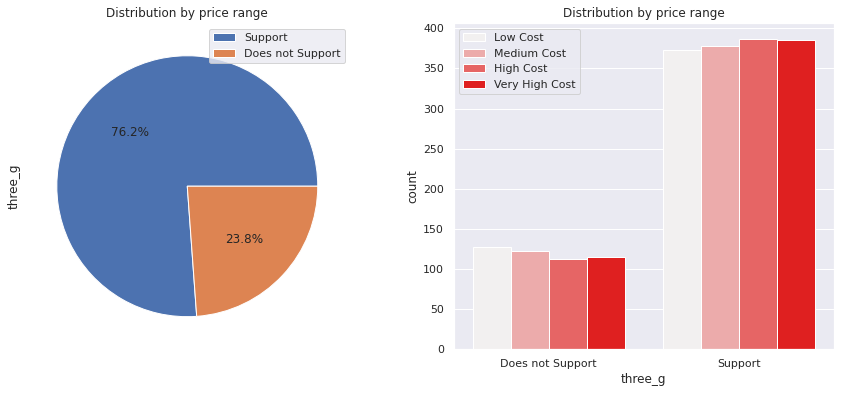

In [28]:
# Plotting of binary features against price range

for col in binary_features:
  fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (15, 6))

  df[col].value_counts().plot.pie (autopct='%1.1f%%', ax = ax1, labeldistance=None)
  ax1.set_title('Distribution by price range')
  ax1.legend(['Support', 'Does not Support'])
  sns.countplot(x = col, hue = 'price_range', data = df, ax = ax2, color = 'red')
  ax2.set_title('Distribution by price range')
  ax2.set_xlabel(col)
  ax2.legend(['Low Cost', 'Medium Cost', 'High Cost', 'Very High Cost'])
  ax2.set_xticklabels(['Does not Support', 'Support'])

**feature `three_g` play an important role in prediction**

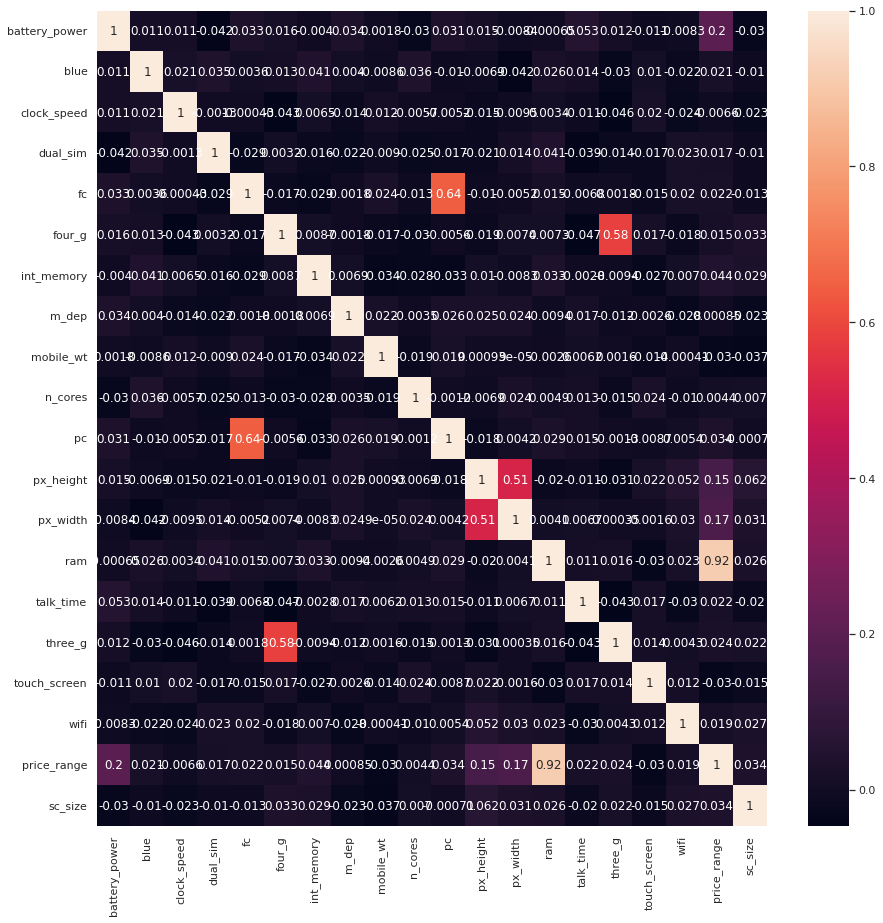

In [29]:
# Checking for multi-collinearity

correlation = df.corr()
plt.figure(figsize = [15, 15])
sns.heatmap(correlation, annot = True)

* `ram` and `price_range` shows high correlation which is a good sign, it signifies that `ram` will play major deciding factor in estimating the price range.

* if `px_height` increases, `pixel width` also increases, that means the overall pixels in the screen. We can replace these two features with one feature.
Front Camera megapixels and Primary camera megapixels are different entities despite of showing colinearity. So we are going to keep them as they are.

* Also, There is some collinearity in feature pairs (`pc`, `fc`) and (`px_width`, `px_height`). Both correlations are justified since there are good chances that if primary camera of a phone is good quality, then front camera would also be good quality.



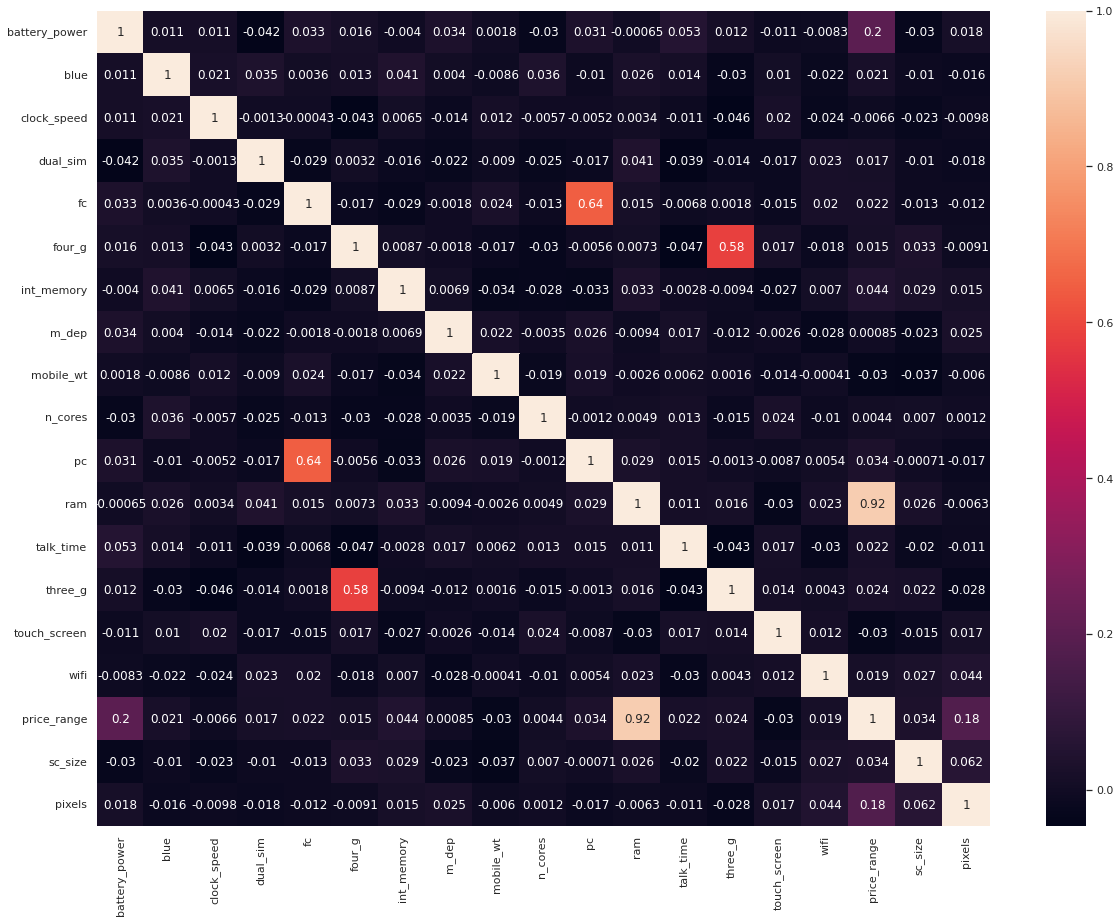

In [30]:
#  defining new variable for pixels

df['pixels'] = df['px_height']*df['px_width']
# Dropping px_height and px_width

df.drop(['px_height', 'px_width'], axis = 1, inplace = True)
# Checking for multi-collinearity

correlation = df.corr()
plt.figure(figsize = [20, 15])
sns.heatmap(correlation, annot = True)

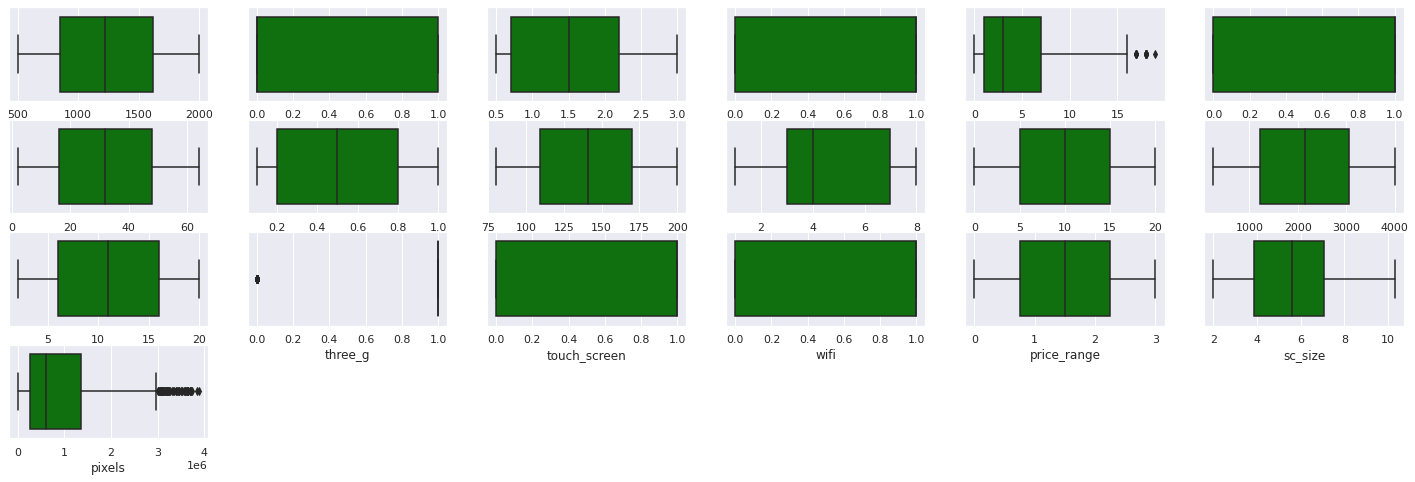

In [31]:
# looking for outliers using box plot
plt.figure(figsize=(25,10))
for index,item in enumerate([i for i in df.describe().columns.to_list()] ):
  plt.subplot(5,6,index+1)
  sns.boxplot(df[item],color='green')
print("\n")

###**we are out off outliers**

##**Our dataset is ready for machine learning algorithms**

In [32]:
#before applying machine learning algorithm we are going to copy the cleaned data in to google drive
df.to_csv('/content/drive/MyDrive/capstone project 3/cleaned_data.csv')

In [33]:
# splitting the data into X dataset and y dataset
X=df.drop(['price_range'],axis=1)
y=df['price_range']

In [34]:
# checking the shape of X dataset and y dataset
X.shape,y.shape

((2000, 18), (2000,))

In [35]:
#using min max scaler we are going to scale the data
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_scaled=scaler.fit_transform(X)


In [36]:
# Now splitting the dataset in to train and test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.2,random_state=40)

In [37]:
X_train.shape

(1600, 18)

In [38]:
y_train.shape

(1600,)

##**1)Logistic Regression**

In [39]:
#applying our first classification algorith i.e. logistic regression

from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)





LogisticRegression()

In [40]:
#prediction
y_pred_train=lr.predict(X_train)
y_pred_test=lr.predict(X_test)

In [41]:
#evalution matrix for test
from sklearn.metrics import classification_report
print('the classification report for the ofr test set = ')
print(classification_report(y_test,y_pred_test))


the classification report for the ofr test set = 
              precision    recall  f1-score   support

           0       0.94      0.95      0.95       108
           1       0.90      0.85      0.87        98
           2       0.86      0.83      0.84        94
           3       0.89      0.96      0.92       100

    accuracy                           0.90       400
   macro avg       0.90      0.90      0.90       400
weighted avg       0.90      0.90      0.90       400



[[103   5   0   0]
 [  6  83   9   0]
 [  0   4  78  12]
 [  0   0   4  96]]


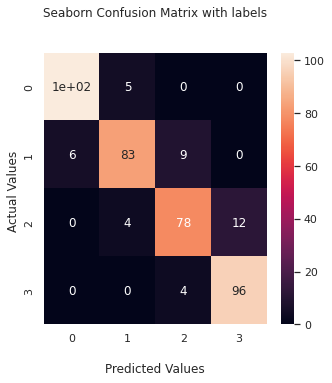

In [45]:
#preparing confusion matrix using seaborn

import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generating the confusion matrix
c_matrics=confusion_matrix(y_test,y_pred_test)
print(c_matrics)

ax=sns.heatmap(c_matrics,annot=True)

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels([0,1,2,3])
ax.yaxis.set_ticklabels([0,1,2,3])

## Display the visualization of the Confusion Matrix.
plt.show()

In [46]:
# Evaluation metrics for train

from sklearn.metrics import classification_report
print('Classification report for Logistic Regression (Train set)= ')
print( classification_report(y_pred_train, y_train))

Classification report for Logistic Regression (Train set)= 
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       400
           1       0.89      0.89      0.89       401
           2       0.86      0.91      0.88       383
           3       0.97      0.94      0.95       416

    accuracy                           0.92      1600
   macro avg       0.92      0.92      0.92      1600
weighted avg       0.92      0.92      0.92      1600



[[379  13   0   0]
 [ 21 357  24   0]
 [  0  31 348  27]
 [  0   0  11 389]]


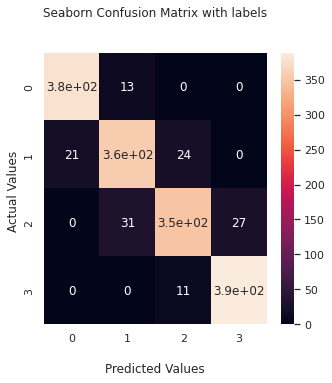

In [47]:
#preparing confusion matrix using seaborn

import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generating the confusion matrix
c_matrics=confusion_matrix(y_train,y_pred_train)
print(c_matrics)

ax=sns.heatmap(c_matrics,annot=True)

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels([0,1,2,3])
ax.yaxis.set_ticklabels([0,1,2,3])

## Display the visualization of the Confusion Matrix.
plt.show()

##**2)Random forest**

In [48]:
from sklearn.metrics import accuracy_score,classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [49]:
#taking 300 trees value
clsr=RandomForestClassifier(n_estimators=300)
clsr.fit(X_train,y_train)

RandomForestClassifier(n_estimators=300)

In [51]:
y_pred=clsr.predict(X_test)
test_score=accuracy_score(y_test,y_pred)
test_score

0.88

In [53]:
y_pred_train=clsr.predict(X_train)
train_score=accuracy_score(y_train,y_pred_train)
train_score

1.0

In [55]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.94      0.96       108
           1       0.86      0.85      0.86        98
           2       0.78      0.81      0.80        94
           3       0.89      0.91      0.90       100

    accuracy                           0.88       400
   macro avg       0.88      0.88      0.88       400
weighted avg       0.88      0.88      0.88       400



[[102   6   0   0]
 [  3  83  12   0]
 [  0   7  76  11]
 [  0   0   9  91]]


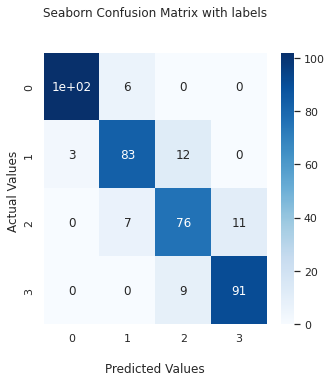

In [56]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

print(cf_matrix)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels([0,1,2,3])
ax.yaxis.set_ticklabels([0,1,2,3])

## Display the visualization of the Confusion Matrix.
plt.show()

In [57]:
feature_importance = pd.DataFrame({'Feature':X.columns,
                                   'Score':clsr.feature_importances_}).sort_values(by='Score', ascending=False).reset_index(drop=True)
feature_importance.head()

,Feature,Score
0,ram,0.508382
1,battery_power,0.084912
2,pixels,0.076609
3,mobile_wt,0.042005
4,sc_size,0.040198


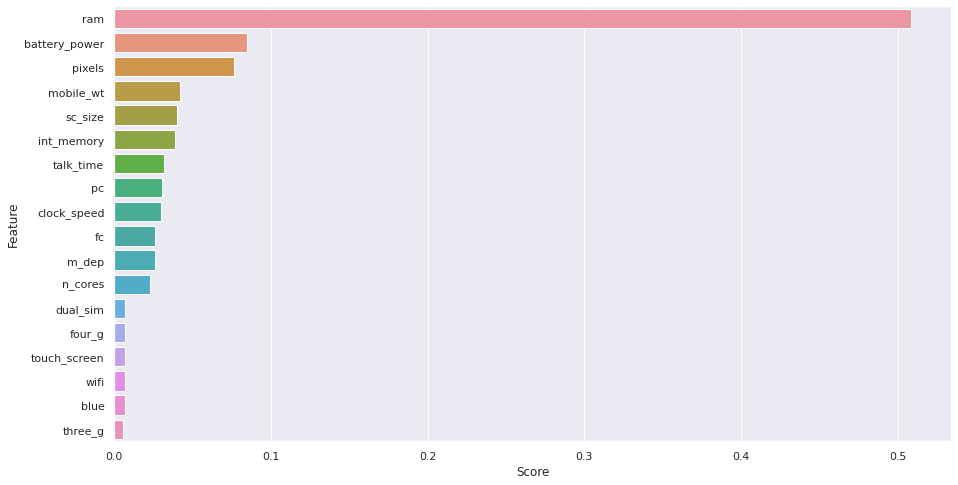

In [58]:
#plotting feature importances in descending order
fig, ax = plt.subplots(figsize=(15,8))
ax = sns.barplot(x=feature_importance['Score'], y=feature_importance['Feature'])
plt.show()

### **now we will use hyperparameter in random forest**

In [67]:
#importing grid search in cross validation
from sklearn.model_selection import GridSearchCV
params = {'n_estimators':[10,50,100],
          'max_depth':[10,20,30,40],
           'min_samples_split':[2,4,6],
          'max_features':['sqrt',4,'log2','auto'],
          'max_leaf_nodes':[10, 20, 30]
          }
rf = RandomForestClassifier()
clsr = GridSearchCV(rf, params, scoring='accuracy', cv=3)
clsr.fit(X, y)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 20, 30, 40],
                         'max_features': ['sqrt', 4, 'log2', 'auto'],
                         'max_leaf_nodes': [10, 20, 30],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [10, 50, 100]},
             scoring='accuracy')

In [64]:
#getting besting parameters
clsr.best_params_

{'max_depth': 30,
 'max_features': 4,
 'max_leaf_nodes': 30,
 'min_samples_split': 2,
 'n_estimators': 100}

In [65]:
#getting best estimators
clsr.best_estimator_

RandomForestClassifier(max_depth=30, max_features=4, max_leaf_nodes=30)

In [66]:
clsr.best_score_

0.853997925961944

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42) #newest gcv
clsr = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=30, max_features=4,
                       max_leaf_nodes=30, max_samples=None,
                       min_impurity_decrease=0.0,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
clsr.fit(X_train, y_train)

RandomForestClassifier(max_depth=30, max_features=4, max_leaf_nodes=30)

In [77]:
y_pred = clsr.predict(X_test)
accuracy_score(y_test, y_pred)

0.865

In [79]:
#getting precision,recall and f1-score
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95       105
           1       0.84      0.84      0.84        91
           2       0.76      0.77      0.76        92
           3       0.91      0.87      0.89       112

    accuracy                           0.86       400
   macro avg       0.86      0.86      0.86       400
weighted avg       0.87      0.86      0.86       400



[[102   3   0   0]
 [  7  76   8   0]
 [  0  11  71  10]
 [  0   0  15  97]]


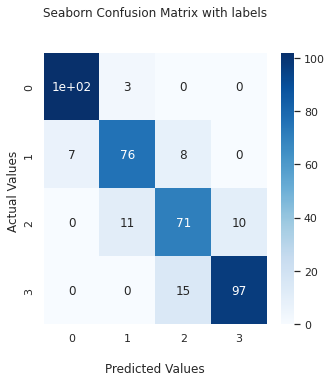

In [80]:
# plotting heatmap of confusion matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

print(cf_matrix)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels([0,1,2,3])
ax.yaxis.set_ticklabels([0,1,2,3])

## Display the visualization of the Confusion Matrix.
plt.show()

In [81]:
#predicting for train set
y_pred = clsr.predict(X_train)
accuracy_score(y_train, y_pred)

0.925

In [84]:
# getting precision, recall, f1-score
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       395
           1       0.88      0.89      0.89       409
           2       0.91      0.87      0.89       408
           3       0.97      0.96      0.97       388

    accuracy                           0.93      1600
   macro avg       0.93      0.93      0.93      1600
weighted avg       0.93      0.93      0.92      1600



In [85]:
# getting dataset of important feature with descending order
feature_importance = pd.DataFrame({'Feature':X.columns,
                                   'Score':clsr.feature_importances_}).sort_values(by='Score', ascending=False).reset_index(drop=True)
feature_importance.head()

,Feature,Score
0,ram,0.718217
1,battery_power,0.071925
2,pixels,0.056604
3,int_memory,0.024836
4,sc_size,0.022228


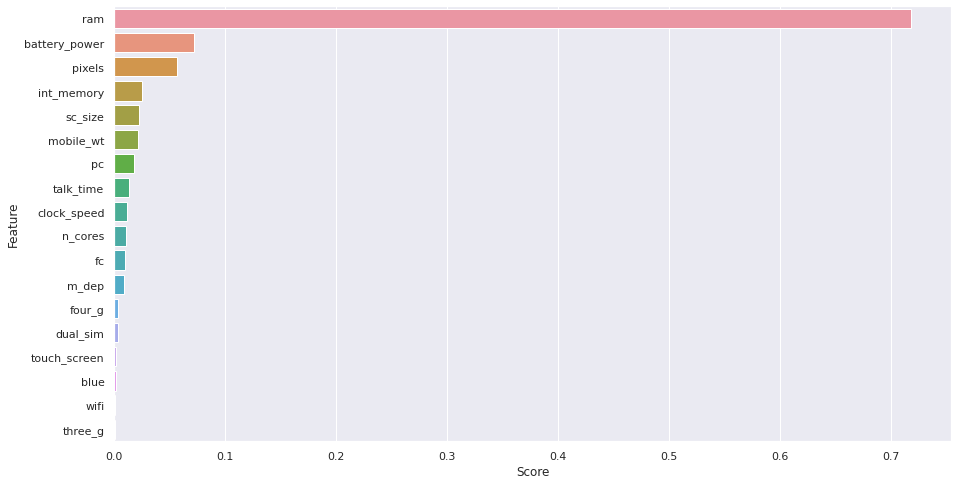

In [87]:
#plot for feature importances in descending order
ig, ax = plt.subplots(figsize=(15,8))
ax = sns.barplot(x=feature_importance['Score'], y=feature_importance['Feature'])
plt.show()

## **Decision Tree**

In [89]:
# Applying Decision Tree to fit model in train dataset

from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(max_depth = 5)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [90]:
# Prediction

y_pred_test = dtc.predict(X_test)
y_pred_train = dtc.predict(X_train)

In [91]:

accuracy_score(y_test, y_pred_test)

0.82

In [93]:
# Evaluation metrics for test

print('Classification report for Decision Tree (Test set)= ')
print(classification_report(y_pred_test, y_test))

Classification report for Decision Tree (Test set)= 
              precision    recall  f1-score   support

           0       0.87      0.98      0.92        93
           1       0.81      0.73      0.77       101
           2       0.78      0.67      0.72       108
           3       0.81      0.93      0.87        98

    accuracy                           0.82       400
   macro avg       0.82      0.83      0.82       400
weighted avg       0.82      0.82      0.82       400



In [94]:
# Cross validation

from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(dtc, param_grid = {'max_depth': (5, 30), 'max_leaf_nodes': (10, 100)}, scoring = 'accuracy', cv = 5, verbose = 24)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5; 1/4] START max_depth=5, max_leaf_nodes=10..............................
[CV 1/5; 1/4] END max_depth=5, max_leaf_nodes=10;, score=0.816 total time=   0.0s
[CV 2/5; 1/4] START max_depth=5, max_leaf_nodes=10..............................
[CV 2/5; 1/4] END max_depth=5, max_leaf_nodes=10;, score=0.812 total time=   0.0s
[CV 3/5; 1/4] START max_depth=5, max_leaf_nodes=10..............................
[CV 3/5; 1/4] END max_depth=5, max_leaf_nodes=10;, score=0.809 total time=   0.0s
[CV 4/5; 1/4] START max_depth=5, max_leaf_nodes=10..............................
[CV 4/5; 1/4] END max_depth=5, max_leaf_nodes=10;, score=0.769 total time=   0.0s
[CV 5/5; 1/4] START max_depth=5, max_leaf_nodes=10..............................
[CV 5/5; 1/4] END max_depth=5, max_leaf_nodes=10;, score=0.809 total time=   0.0s
[CV 1/5; 2/4] START max_depth=5, max_leaf_nodes=100.............................
[CV 1/5; 2/4] END max_depth=5, max_leaf_node

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(max_depth=5),
             param_grid={'max_depth': (5, 30), 'max_leaf_nodes': (10, 100)},
             scoring='accuracy', verbose=24)

In [95]:
# Prediction for dross validation

y_pred_test = grid.predict(X_test)
y_pres_train = grid.predict(X_train)
# Evaluation metrics for test

print('Classification Report for Decision Tree (Test set)= ')
print(classification_report(y_test, y_pred_test))

Classification Report for Decision Tree (Test set)= 
              precision    recall  f1-score   support

           0       0.96      0.90      0.93       105
           1       0.75      0.85      0.79        91
           2       0.77      0.71      0.74        92
           3       0.90      0.92      0.91       112

    accuracy                           0.85       400
   macro avg       0.84      0.84      0.84       400
weighted avg       0.85      0.85      0.85       400



[[ 94  11   0   0]
 [  4  77  10   0]
 [  0  15  65  12]
 [  0   0   9 103]]


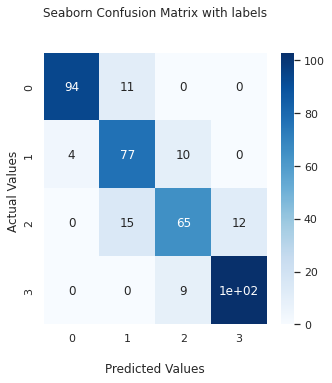

In [96]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred_test)

print(cf_matrix)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels([0,1,2,3])
ax.yaxis.set_ticklabels([0,1,2,3])

## Display the visualization of the Confusion Matrix.
plt.show()

In [97]:
# Evaluation metrics for train

print('Classification Report for Decision Tree (Train set)= ')
print(classification_report(y_train, y_pred_train))

Classification Report for Decision Tree (Train set)= 
              precision    recall  f1-score   support

           0       0.98      0.91      0.94       395
           1       0.81      0.88      0.84       409
           2       0.77      0.84      0.80       408
           3       0.96      0.84      0.90       388

    accuracy                           0.87      1600
   macro avg       0.88      0.87      0.87      1600
weighted avg       0.88      0.87      0.87      1600



##**XGboost**

In [98]:
# Applying XGBoost

from xgboost import XGBClassifier

xgb = XGBClassifier(max_depth = 5, learning_rate = 0.1)
xgb.fit(X_train, y_train)
XGBClassifier(max_depth=5, objective='multi:softprob')
# Prediction

y_pred_train = xgb.predict(X_train)
y_pred_test = xgb.predict(X_test)
# Evaluation metrics for test

score = classification_report(y_test, y_pred_test)
print('Classification Report for XGBoost(Test set)= ')
print(score)

Classification Report for XGBoost(Test set)= 
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       105
           1       0.84      0.90      0.87        91
           2       0.85      0.84      0.84        92
           3       0.94      0.91      0.93       112

    accuracy                           0.90       400
   macro avg       0.89      0.90      0.89       400
weighted avg       0.90      0.90      0.90       400



In [99]:
# Evaluation metrics for train

score = classification_report(y_train, y_pred_train)
print('Classification Report for XGBoost(Train set)= ')
print(score)

Classification Report for XGBoost(Train set)= 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       395
           1       1.00      1.00      1.00       409
           2       1.00      1.00      1.00       408
           3       1.00      1.00      1.00       388

    accuracy                           1.00      1600
   macro avg       1.00      1.00      1.00      1600
weighted avg       1.00      1.00      1.00      1600



In [100]:
# Giving Cross validation rates and fitting model with grid search cross validation

grid = GridSearchCV(xgb, param_grid={'n_estimators': (10, 200), 'learning_rate': [1, 0.5, 0.1, 0.01, 0.001], 'max_depth': (5, 10),
                                     'gamma': [1.5, 1.8], 'subsample': [0.3, 0.5, 0.8]}, cv = 5, scoring = 'accuracy', verbose = 10)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
[CV 1/5; 1/120] START gamma=1.5, learning_rate=1, max_depth=5, n_estimators=10, subsample=0.3
[CV 1/5; 1/120] END gamma=1.5, learning_rate=1, max_depth=5, n_estimators=10, subsample=0.3;, score=0.869 total time=   0.1s
[CV 2/5; 1/120] START gamma=1.5, learning_rate=1, max_depth=5, n_estimators=10, subsample=0.3
[CV 2/5; 1/120] END gamma=1.5, learning_rate=1, max_depth=5, n_estimators=10, subsample=0.3;, score=0.887 total time=   0.1s
[CV 3/5; 1/120] START gamma=1.5, learning_rate=1, max_depth=5, n_estimators=10, subsample=0.3
[CV 3/5; 1/120] END gamma=1.5, learning_rate=1, max_depth=5, n_estimators=10, subsample=0.3;, score=0.859 total time=   0.1s
[CV 4/5; 1/120] START gamma=1.5, learning_rate=1, max_depth=5, n_estimators=10, subsample=0.3
[CV 4/5; 1/120] END gamma=1.5, learning_rate=1, max_depth=5, n_estimators=10, subsample=0.3;, score=0.869 total time=   0.1s
[CV 5/5; 1/120] START gamma=1.5, learning_rate=1, max_depth=5

GridSearchCV(cv=5,
             estimator=XGBClassifier(max_depth=5, objective='multi:softprob'),
             param_grid={'gamma': [1.5, 1.8],
                         'learning_rate': [1, 0.5, 0.1, 0.01, 0.001],
                         'max_depth': (5, 10), 'n_estimators': (10, 200),
                         'subsample': [0.3, 0.5, 0.8]},
             scoring='accuracy', verbose=10)

In [102]:
# Prediction with grid 

y_pred_train = grid.predict(X_train)
y_pred_test = grid.predict(X_test)


In [103]:
# Evaluation metrics for test

score = classification_report(y_test, y_pred_test)
print('Classification Report for tuned XGBoost(Test set)= ')
print(score)

Classification Report for tuned XGBoost(Test set)= 
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       105
           1       0.85      0.89      0.87        91
           2       0.84      0.87      0.86        92
           3       0.95      0.91      0.93       112

    accuracy                           0.90       400
   macro avg       0.90      0.90      0.90       400
weighted avg       0.90      0.90      0.90       400



[[ 98   7   0   0]
 [  5  81   5   0]
 [  0   7  80   5]
 [  0   0  10 102]]


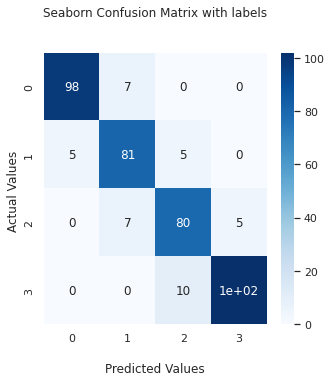

In [104]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred_test)

print(cf_matrix)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels([0,1,2,3])
ax.yaxis.set_ticklabels([0,1,2,3])

## Display the visualization of the Confusion Matrix.
plt.show()

In [105]:
# Evaluation metrics for train

score = classification_report(y_train, y_pred_train)
print('Classification Report for tuned XGBoost(Train set)= ')
print(score)

Classification Report for tuned XGBoost(Train set)= 
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       395
           1       0.97      0.97      0.97       409
           2       0.96      0.98      0.97       408
           3       1.00      0.98      0.99       388

    accuracy                           0.98      1600
   macro avg       0.98      0.98      0.98      1600
weighted avg       0.98      0.98      0.98      1600

